In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 5)
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, brier_score_loss)
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import itertools

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("data.csv", sep=";", index_col="histid").iloc[:, :-5]
df.head()

,stay,age,outcome,afib,oxyg,oair,vent,death,hyper,chf,diab,ckd,onco,copd,sex
histid,,,,,,,,,,,,,,,
16532,8,84,0,1,1,0,0,0,0,1,0,0,0,0,1
15602,7,71,0,0,0,0,0,0,0,0,0,0,0,0,1
15606,8,60,0,0,0,0,0,0,0,0,0,0,0,0,0
15607,8,45,0,0,0,0,0,0,0,0,0,0,0,0,0
15609,18,26,0,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 16532 to 15857
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   stay     215 non-null    int64
 1   age      215 non-null    int64
 2   outcome  215 non-null    int64
 3   afib     215 non-null    int64
 4   oxyg     215 non-null    int64
 5   oair     215 non-null    int64
 6   vent     215 non-null    int64
 7   death    215 non-null    int64
 8   hyper    215 non-null    int64
 9   chf      215 non-null    int64
 10  diab     215 non-null    int64
 11  ckd      215 non-null    int64
 12  onco     215 non-null    int64
 13  copd     215 non-null    int64
 14  sex      215 non-null    int64
dtypes: int64(15)
memory usage: 26.9 KB


sex: 1 - female, 0 - male  
outcome: 1 - death, 0 - survival

1    130
0     85
Name: sex, dtype: int64


1    0.604651
0    0.395349
Name: sex, dtype: float64

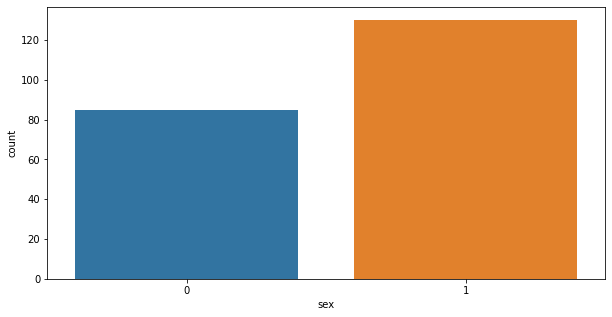

In [4]:
sns.countplot(x=df.sex);
print(df.sex.value_counts())
df.sex.value_counts(normalize=True)

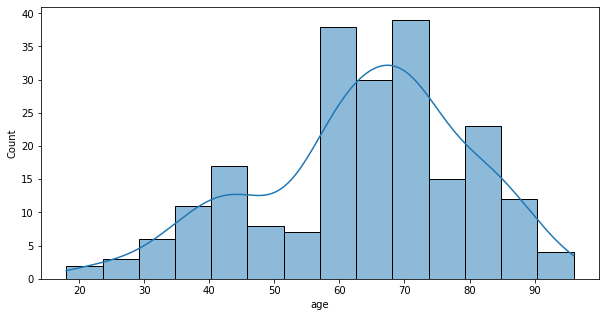

In [5]:
sns.histplot(x=df.age, kde=True);

In [6]:
scipy.stats.normaltest(df.loc[:, "age"])

NormaltestResult(statistic=8.25510913625583, pvalue=0.016122256535189113)

In [7]:
df.age.describe()

count    215.000000
mean      63.762791
std       15.891410
min       18.000000
25%       56.000000
50%       66.000000
75%       73.500000
max       96.000000
Name: age, dtype: float64

0    185
1     30
Name: outcome, dtype: int64


0    0.860465
1    0.139535
Name: outcome, dtype: float64

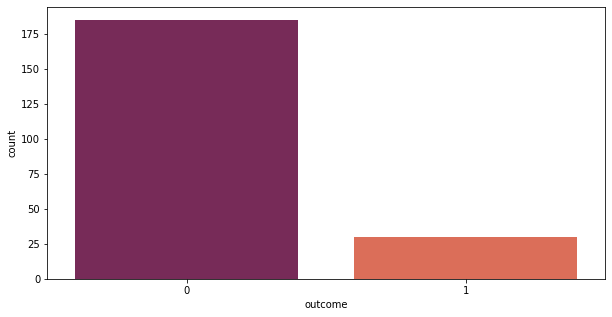

In [8]:
sns.countplot(x=df.outcome, palette="rocket");
print(df.outcome.value_counts())
df.outcome.value_counts(normalize=True)

0    167
1     18
Name: afib, dtype: int64


0    0.860465
1    0.139535
Name: afib, dtype: float64

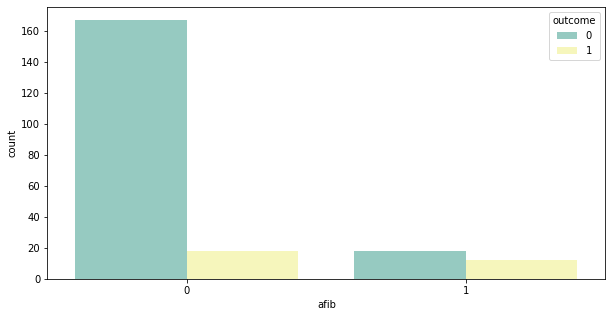

In [9]:
sns.countplot(x=df.afib, hue=df.outcome, palette="Set3");
print(df[df.outcome==0].afib.value_counts())
df.afib.value_counts(normalize=True)

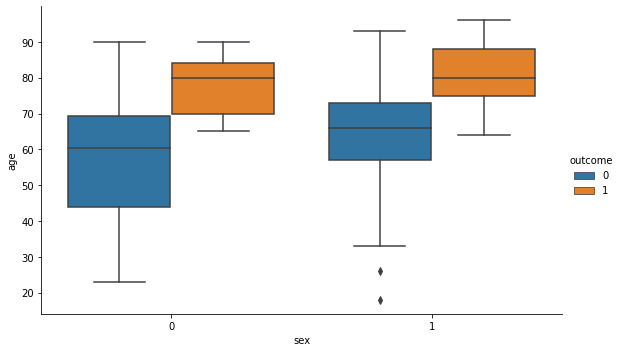

In [10]:
sns.catplot(x="sex", y="age", hue="outcome", kind="box", data=df, height=5, aspect=1.6);

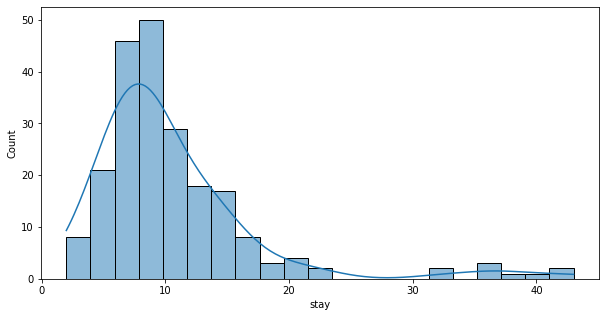

In [11]:
sns.histplot(x=df.stay, kde=True);

In [12]:
df.stay.describe()

count    215.000000
mean      10.558140
std        6.992327
min        2.000000
25%        7.000000
50%        9.000000
75%       13.000000
max       43.000000
Name: stay, dtype: float64

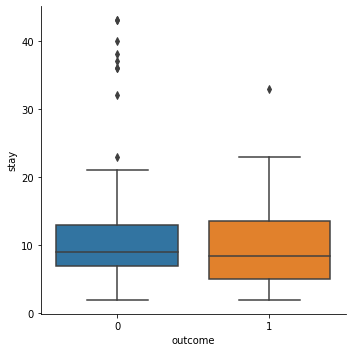

In [13]:
sns.catplot(x="outcome", y="stay", kind="box", data=df);

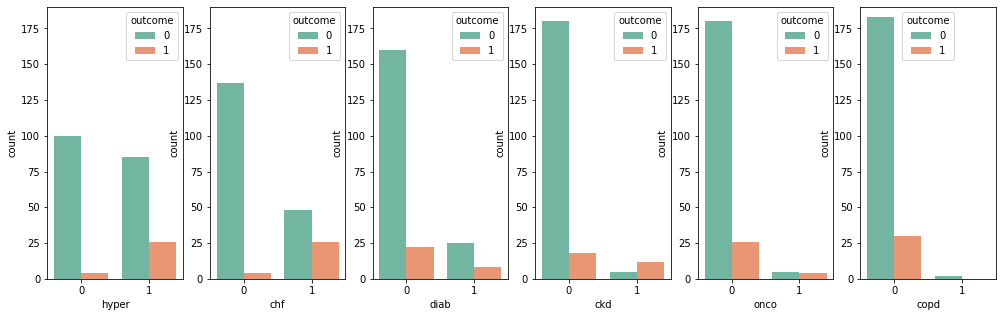

In [14]:
categorical_features = ["hyper", "chf", "diab", "ckd", "onco", "copd"]
fig, ax = plt.subplots(1, 6, figsize=(17, 5))
for i, categorical_feature in enumerate(df[categorical_features]):
    sns.countplot(x=categorical_feature, hue="outcome", data=df, palette="Set2", ax=ax[i]);
    ax[i].set_ylim(0, 190)

In [15]:
df.apply(pd.Series.value_counts)

,stay,age,outcome,afib,oxyg,oair,vent,death,hyper,chf,diab,ckd,onco,copd,sex
0,NaN,NaN,185.0,185.0,115.0,199.0,203.0,185.0,104.0,141.0,182.0,198.0,206.0,213.0,85.0
1,NaN,NaN,30.0,30.0,100.0,16.0,12.0,30.0,111.0,74.0,33.0,17.0,9.0,2.0,130.0
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def create_model(columns, regularize=False):
    X = df.loc[:, columns]
    X = sm.add_constant(X)
    y = df.loc[:, "outcome"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=666)

    model = sm.Logit(y_train, X_train)
    if not regularize:
        result = model.fit(method='newton')
    else:
        result = model.fit_regularized()
    
    yhat = result.predict(X_test)
    prediction = list(map(round, yhat))
    cm = confusion_matrix(y_test, prediction)
    cmatr = pd.DataFrame(cm)
    display(cmatr)
    tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    print('Test accuracy = ', accuracy_score(y_test, prediction))
    
    params = result.params
    conf = result.conf_int()
    conf['Odds Ratio'] = params
    conf.columns = ['5%', '95%', 'Odds Ratio']
    print(np.exp(conf))

    fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
    auc = metrics.roc_auc_score(y_test, yhat)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    return result

In [17]:
def print_roc_for_combinations(columns, regularize=True):
    y = df.loc[:, "outcome"]
    plt.figure(figsize=(10, 10))
    for combination in itertools.combinations(columns, len(columns)-1):
        X = df.loc[:, combination]
        X = sm.add_constant(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=666)

        model = sm.Logit(y_train, X_train)
        if not regularize:
            result = model.fit(method='newton')
        else:
            result = model.fit_regularized()

        yhat = result.predict(X_test)
        fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
        auc = metrics.roc_auc_score(y_test, yhat)
        plt.plot(fpr,tpr,label=f"{combination}, auc="+str(auc))
        plt.legend(loc=4)
    plt.show()
    

Optimization terminated successfully.
         Current function value: 0.281843
         Iterations 8


,0,1
0,126,5
1,10,10


Test accuracy =  0.9006622516556292
                 5%          95%  Odds Ratio
const  6.527914e-07     1.990741    0.001140
hyper  2.348335e-01    63.168137    3.851493
chf    1.792592e-01    14.300920    1.601116
diab   4.743062e-01    19.817720    3.065888
ckd    6.639949e-01   111.166118    8.591492
onco   5.643650e-01  2190.560031   35.160710
sex    2.342389e-02     2.816298    0.256844
afib   3.256655e-01    15.728716    2.263250
age    9.448363e-01     1.173936    1.053175


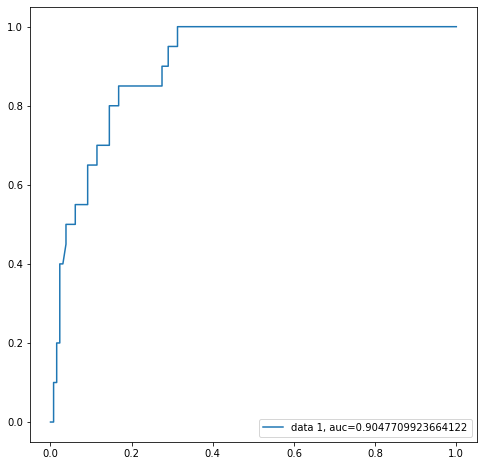

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                   64
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                  0.3497
Time:                        03:32:59   Log-Likelihood:                -18.038
converged:                       True   LL-Null:                       -27.738
Covariance Type:            nonrobust   LLR p-value:                   0.01286
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7768      3.809     -1.779      0.075     -14.242       0.689
hyper          1.3485      1.427      0.945      0.345      -1.449       4.146
chf            0.4707      1.117      0.421      0.674      -1.719       2.660
diab           1.1203      0.952      1.177      0.239      -0.746       2.987
ckd            2.1508      1.306      1.646      0.100      -0.409       4.711
onco           3.5599      2.108      1.689      0.091      -0.572       7.692
sex           -1.3593      1.222     -1.113      0.266      -3.754       1.035
afib           0.8168      0.989      0.826      0.409      -1.122       2.755
age            0.0518      0.055      0.935      0.350      -0.057       0.160
==============================================================================
"""

In [18]:
create_model(["hyper", "chf", "diab", "ckd", "onco", "sex", "afib", "age"]).summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28184268964652176
            Iterations: 64
            Function evaluations: 69
            Gradient evaluations: 64


,0,1
0,126,5
1,10,10


Test accuracy =  0.9006622516556292
                 5%          95%  Odds Ratio
const  6.528286e-07     1.990740    0.001140
hyper  2.348345e-01    63.166182    3.851441
chf    1.792648e-01    14.301181    1.601155
diab   4.743207e-01    19.818298    3.065979
ckd    6.639840e-01   111.163560    8.591323
onco   5.643521e-01  2190.516657   35.159957
sex    2.342270e-02     2.816144    0.256830
afib   3.256727e-01    15.729080    2.263301
age    9.448366e-01     1.173936    1.053175


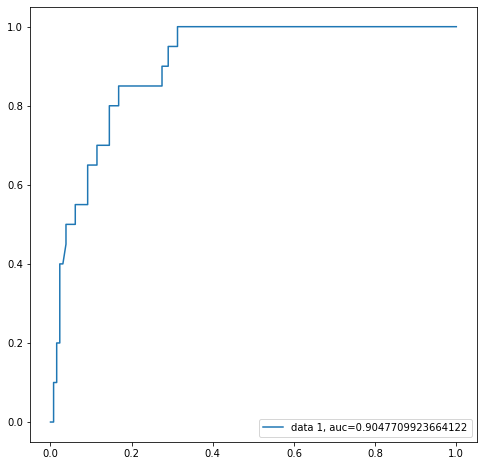

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                   64
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                  0.3497
Time:                        03:32:59   Log-Likelihood:                -18.038
converged:                       True   LL-Null:                       -27.738
Covariance Type:            nonrobust   LLR p-value:                   0.01286
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7767      3.809     -1.779      0.075     -14.242       0.689
hyper          1.3484      1.427      0.945      0.345      -1.449       4.146
chf            0.4707      1.117      0.421      0.673      -1.719       2.660
diab           1.1204      0.952      1.177      0.239      -0.746       2.987
ckd            2.1508      1.306      1.646      0.100      -0.409       4.711
onco           3.5599      2.108      1.689      0.091      -0.572       7.692
sex           -1.3593      1.222     -1.113      0.266      -3.754       1.035
afib           0.8168      0.989      0.826      0.409      -1.122       2.756
age            0.0518      0.055      0.935      0.350      -0.057       0.160
==============================================================================
"""

In [19]:
create_model(["hyper", "chf", "diab", "ckd", "onco", "sex", "afib", "age"], regularize=True).summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3099806910035031
            Iterations: 41
            Function evaluations: 47
            Gradient evaluations: 41


,0,1
0,125,6
1,9,11


Test accuracy =  0.9006622516556292
             5%         95%  Odds Ratio
const  0.000002    0.507845    0.001068
ckd    1.220469   94.497231   10.739225
onco   0.846916  609.047225   22.711493
sex    0.059670    4.016946    0.489582
afib   0.411942   15.900643    2.559326
age    0.981394    1.169104    1.071145


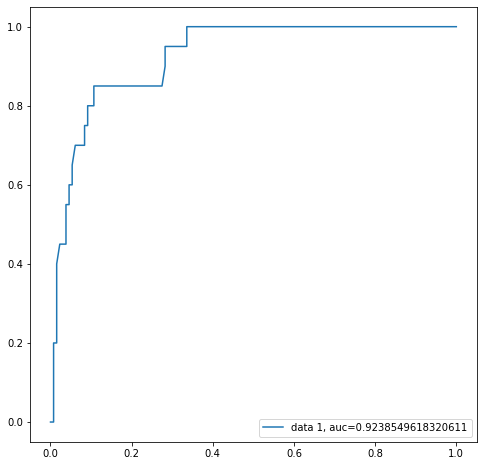

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                   64
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                  0.2848
Time:                        03:32:59   Log-Likelihood:                -19.839
converged:                       True   LL-Null:                       -27.738
Covariance Type:            nonrobust   LLR p-value:                  0.007447
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8416      3.145     -2.175      0.030     -13.006      -0.678
ckd            2.3739      1.110      2.140      0.032       0.199       4.549
onco           3.1229      1.678      1.861      0.063      -0.166       6.412
sex           -0.7142      1.074     -0.665      0.506      -2.819       1.391
afib           0.9397      0.932      1.008      0.313      -0.887       2.766
age            0.0687      0.045      1.539      0.124      -0.019       0.156
==============================================================================
"""

In [20]:
result = create_model(["ckd", "onco", "sex", "afib", "age"], regularize=True)
result.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3032569507312386
            Iterations: 41
            Function evaluations: 42
            Gradient evaluations: 41
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2999769917785712
            Iterations: 43
            Function evaluations: 48
            Gradient evaluations: 43
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.295550738538227
            Iterations: 43
            Function evaluations: 48
            Gradient evaluations: 43
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.31069182395319966
            Iterations: 40
            Function evaluations: 45
            Gradient evaluations: 40
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33179391135662023
            Iterations: 42
            Function ev

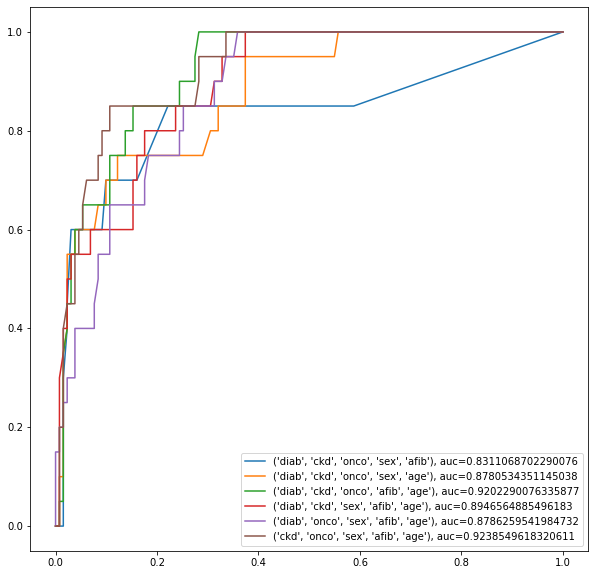

In [21]:
print_roc_for_combinations(["diab", "ckd", "onco", "sex", "afib", "age"], regularize=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3338855813010647
            Iterations: 34
            Function evaluations: 35
            Gradient evaluations: 34
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3176138439779118
            Iterations: 36
            Function evaluations: 41
            Gradient evaluations: 36
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3134010595365736
            Iterations: 36
            Function evaluations: 41
            Gradient evaluations: 36
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3341978890427042
            Iterations: 33
            Function evaluations: 38
            Gradient evaluations: 33
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3483931081002337
            Iterations: 40
            Function eva

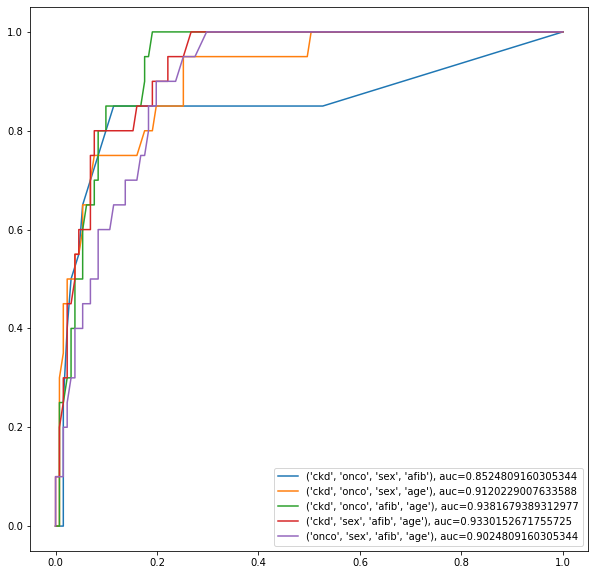

In [22]:
print_roc_for_combinations(["ckd", "onco", "sex", "afib", "age"], regularize=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3341978890427042
            Iterations: 33
            Function evaluations: 38
            Gradient evaluations: 33


,0,1
0,128,3
1,12,8


Test accuracy =  0.9006622516556292
             5%        95%  Odds Ratio
const  0.000015   0.560313    0.002947
ckd    1.048126  68.622563    8.480865
sex    0.115363   5.241279    0.777593
afib   0.347948  11.200549    1.974136
age    0.979341   1.138391    1.055875


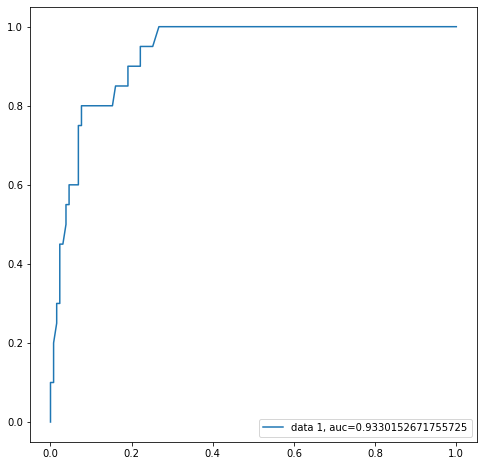

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                   64
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            4
Date:                Tue, 29 Mar 2022   Pseudo R-squ.:                  0.2289
Time:                        03:33:00   Log-Likelihood:                -21.389
converged:                       True   LL-Null:                       -27.738
Covariance Type:            nonrobust   LLR p-value:                   0.01285
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8270      2.677     -2.176      0.030     -11.075      -0.579
ckd            2.1378      1.067      2.004      0.045       0.047       4.229
sex           -0.2516      0.974     -0.258      0.796      -2.160       1.657
afib           0.6801      0.886      0.768      0.443      -1.056       2.416
age            0.0544      0.038      1.416      0.157      -0.021       0.130
==============================================================================
"""

In [23]:
result = create_model(["ckd", "sex", "afib", "age"], regularize=True)
result.summary()

In [25]:
pd.DataFrame({'Sensitivity' : [128/(128+3)], 'Specifity' : [8/(12+8)]})

,Sensitivity,Specifity
0,0.977099,0.4
